In [19]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.stats import skew
import seaborn as sns
from sklearn import linear_model
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
import statsmodels.formula.api as smf
import statsmodels.api as sm
%matplotlib inline

In [27]:
df = pd.read_csv('/content/401K.csv')
df

,prate,mrate,totpart,totelg,age,totemp,sole,ltotemp
0,26.1,0.21,1653,6322,8,8709.0,0,9.072112
1,100.0,1.42,262,262,6,315.0,1,5.752573
2,97.6,0.91,166,170,10,275.0,1,5.616771
3,100.0,0.42,257,257,7,500.0,0,6.214608
4,82.5,0.53,591,716,28,933.0,1,6.838405
...,...,...,...,...,...,...,...,...
1529,85.1,0.33,553,650,24,907.0,0,6.810143
1530,100.0,2.52,142,142,17,197.0,1,5.283204
1531,100.0,2.27,1928,1928,35,2171.0,0,7.682943
1532,100.0,0.58,166,166,8,931.0,1,6.836259


In [21]:
df.describe()

,prate,mrate,totpart,totelg,age,totemp,sole,ltotemp
count,1534.000000,1534.000000,1534.000000,1534.000000,1534.000000,1534.000000,1534.000000,1534.000000
mean,87.362907,0.731512,1354.230769,1628.534550,13.181226,3567.321382,0.487614,6.686034
std,16.716537,0.779539,4629.264665,5370.719356,9.171114,11199.875376,0.500010,1.453375
min,3.000000,0.010000,50.000000,51.000000,4.000000,58.000000,0.000000,4.060443
25%,78.025000,0.300000,156.250000,176.000000,7.000000,261.000000,0.000000,5.564520
50%,95.700000,0.460000,276.000000,330.000000,9.000000,588.000000,0.000000,6.376726
75%,100.000000,0.830000,749.500000,890.500000,18.000000,1804.000000,1.000000,7.497762
max,100.000000,4.910000,58811.000000,70429.000000,51.000000,140000.000000,1.000000,11.880250


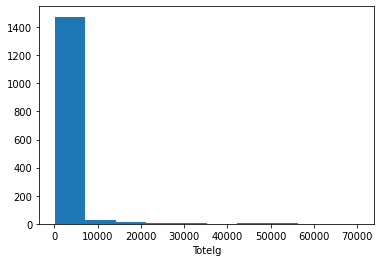

7.329735370307872


In [22]:
plt.hist(df['totelg'])
plt.xlabel("Totelg")
plt.show()
print(skew(df['totelg'],bias=False))
df['totelg'] = np.log(df['totelg'])

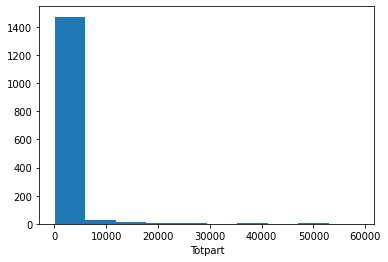

7.772191403038769
1.2279679670943453


In [23]:
plt.hist(df['totpart'])
plt.xlabel("Totpart")
plt.show()
print(skew(df['totpart'],bias=False))
df['totpart'] = np.log(df['totpart'])
print(skew(df['totpart'],bias=False))

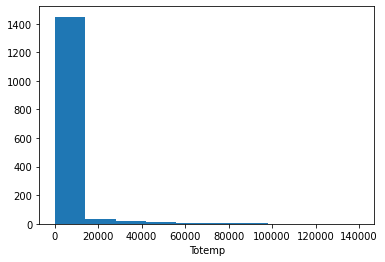

6.070176915351367


In [24]:
plt.hist(df['totemp'])
plt.xlabel("Totemp")
plt.show()
print(skew(df['totemp'],bias=False))

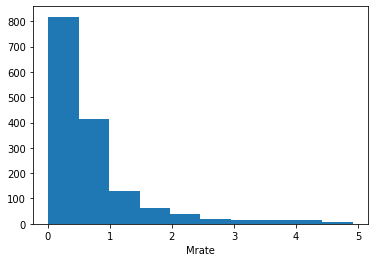

2.5969888800607697


In [28]:
plt.hist(df['mrate'])
plt.xlabel("Mrate")
plt.show()
print(skew(df['mrate'],bias=False))
df['mrate'] = np.log(df['mrate'])

In [29]:
print(skew(df['mrate'],bias=False))

-0.19717102619721422


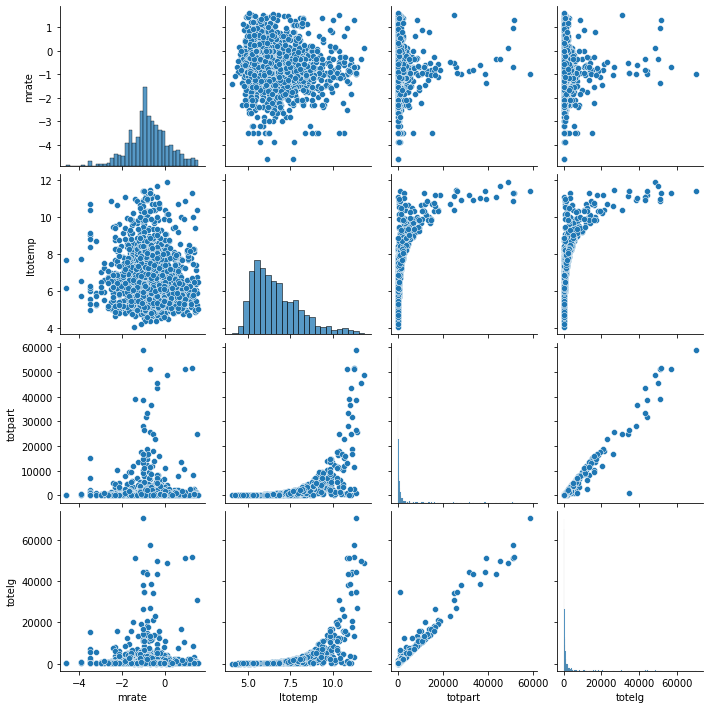

In [30]:
sns.pairplot(df,vars=['mrate','ltotemp','totpart','totelg'])

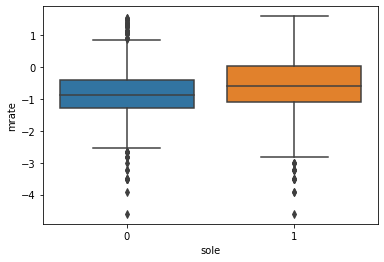

In [31]:
sns.boxplot(x = df['sole'],y=df['mrate'])
plt.show()

In [37]:
X = df[['ltotemp','totpart','totelg','sole','age']]
y = df.mrate
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

# **Linear Regression Using statsmodel**

In [38]:
X2 = sm.add_constant(X_train)
model = sm.OLS(y_train,X2)
results = model.fit()
print(results.summary())
X3 = sm.add_constant(X_test)
y_pred = results.predict(X3)
print("R-Squared error for OLS regression {}".format(r2_score(y_test, y_pred)))
Adj_r2 = 1 - (1-r2_score(y_test, y_pred)) * (len(y_test)-1)/(len(y_test)-X_test.shape[1]-1)
print("Adj-R-Squared error for OLS regression {}".format(Adj_r2))

                            OLS Regression Results                            
Dep. Variable:                  mrate   R-squared:                       0.056
Model:                            OLS   Adj. R-squared:                  0.052
Method:                 Least Squares   F-statistic:                     13.62
Date:                Sun, 12 Mar 2023   Prob (F-statistic):           6.22e-13
Time:                        19:07:21   Log-Likelihood:                -1512.0
No. Observations:                1150   AIC:                             3036.
Df Residuals:                    1144   BIC:                             3066.
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.6225      0.172     -3.621      0.0

# **Linear Regression Using sklearn**

In [39]:
lm = linear_model.LinearRegression()
lm.fit(X_train,y_train)
print("Linear Regression coefficients {}".format(lm.coef_))
print("Linear Regression Intercept {}".format(lm.intercept_))
y_pred = lm.predict(X_test)
print("Mean Squared error for Linear regression {}".format(mean_squared_error(y_test, y_pred)))
print("R-Squared error for Linear regression {}".format(r2_score(y_test, y_pred)))
Adj_r2 = 1 - (1-r2_score(y_test, y_pred)) * (len(y_test)-1)/(len(y_test)-X_test.shape[1]-1)
print("Adj-R-Squared error for Linear regression {}".format(Adj_r2))

Linear Regression coefficients [-6.33465402e-02  7.34344466e-05 -4.89435091e-05  2.18278231e-01
  1.55368388e-02]
Linear Regression Intercept -0.622537365356611
Mean Squared error for Linear regression 0.7748858216485791
R-Squared error for Linear regression 0.0516727079089675
Adj-R-Squared error for Linear regression 0.039128696108821526


# **Lasso Regression**

In [40]:
lm1 = linear_model.Lasso(alpha=0.001)
lm1.fit(X_train,y_train)
print("Lasso Regression coefficients {}".format(lm1.coef_))
print("Lasso Regression Intercept {}".format(lm1.intercept_))
y_pred = lm1.predict(X_test)
print("Mean Squared error for Lasso regression {}".format(mean_squared_error(y_test, y_pred)))
print("R-Squared error for Lasso regression {}".format(r2_score(y_test, y_pred)))
Adj_r2 = 1 - (1-r2_score(y_test, y_pred)) * (len(y_test)-1)/(len(y_test)-X_test.shape[1]-1)
print("Adj-R-Squared error for Lasso regression {}".format(Adj_r2))

Lasso Regression coefficients [-6.31259277e-02  7.35069656e-05 -4.91126892e-05  2.14266533e-01
  1.55180112e-02]
Lasso Regression Intercept -0.6215754562743707
Mean Squared error for Lasso regression 0.7749376889395073
R-Squared error for Lasso regression 0.051609231244173936
Adj-R-Squared error for Lasso regression 0.03906437980560473


# **Lasso CV**

In [41]:
lm1 = linear_model.LassoCV(alphas=np.linspace(0.00001,0.01,200))
lm1.fit(X_train,y_train)
print("Lasso Regression CV coefficients {}".format(lm1.coef_))
print("Lasso Regression CV Intercept {}".format(lm1.intercept_))
print("Lasso Regression CV Alpha {}".format(lm1.alpha_))
print("Lasso Regression CV Alpha {}".format(lm1.alphas_[lm1.mse_path_.mean(1).argmin()]))
y_pred = lm1.predict(X_test)
print("Mean Squared error for Lasso regression CV {}".format(mean_squared_error(y_test, y_pred)))
print("R-Squared error for Lasso regression CV {}".format(r2_score(y_test, y_pred)))
Adj_r2 = 1 - (1-r2_score(y_test, y_pred)) * (len(y_test)-1)/(len(y_test)-X_test.shape[1]-1)
print("Adj-R-Squared error for Lasso regression CV {}".format(Adj_r2))

Lasso Regression CV coefficients [-6.33443341e-02  7.34351718e-05 -4.89452009e-05  2.18238114e-01
  1.55366505e-02]
Lasso Regression CV Intercept -0.6225277462655429
Lasso Regression CV Alpha 1e-05
Lasso Regression CV Alpha 1e-05
Mean Squared error for Lasso regression CV 0.7748862984322874
R-Squared error for Lasso regression CV 0.05167212440751423
Adj-R-Squared error for Lasso regression CV 0.03912810488909502


# **Ridge Regression**

In [42]:
lm1 = linear_model.Ridge(alpha=0.001)
lm1.fit(X_train,y_train)
print("Ridge Regression coefficients {}".format(lm1.coef_))
print("Ridge Regression Intercept {}".format(lm1.intercept_))
y_pred = lm1.predict(X_test)
print("Mean Squared error for Ridge regression {}".format(mean_squared_error(y_test, y_pred)))
print("R-Squared error for Ridge regression {}".format(r2_score(y_test, y_pred)))
Adj_r2 = 1 - (1-r2_score(y_test, y_pred)) * (len(y_test)-1)/(len(y_test)-X_test.shape[1]-1)
print("Adj-R-Squared error for Ridge regression {}".format(Adj_r2))

Ridge Regression coefficients [-6.33466110e-02  7.34344565e-05 -4.89435215e-05  2.18277387e-01
  1.55368381e-02]
Ridge Regression Intercept -0.6225364551630928
Mean Squared error for Ridge regression 0.7748858333564167
R-Squared error for Ridge regression 0.05167269358058302
Adj-R-Squared error for Ridge regression 0.03912868159090821


# **Ridge Regressio CV**

In [43]:
lm1 = linear_model.RidgeCV(alphas=np.linspace(0.00001,0.01,200))
lm1.fit(X_train,y_train)
print("Ridge Regression CV coefficients {}".format(lm1.coef_))
print("Ridge Regression CV Intercept {}".format(lm1.intercept_))
print("Ridge Regression CV Alpha {}".format(lm1.alpha_))
y_pred = lm1.predict(X_test)
print("Mean Squared error for Ridge regression CV {}".format(mean_squared_error(y_test, y_pred)))
print("R-Squared error for Ridge regression CV {}".format(r2_score(y_test, y_pred)))
Adj_r2 = 1 - (1-r2_score(y_test, y_pred)) * (len(y_test)-1)/(len(y_test)-X_test.shape[1]-1)
print("Adj-R-Squared error for Lasso regression CV {}".format(Adj_r2))

Ridge Regression CV coefficients [-6.33472478e-02  7.34401983e-05 -4.89330268e-05  2.18269792e-01
  1.55368317e-02]
Ridge Regression CV Intercept -0.6225529335782863
Ridge Regression CV Alpha 0.01
Mean Squared error for Ridge regression CV 0.7749001141724969
R-Squared error for Ridge regression CV 0.051655216311979335
Adj-R-Squared error for Lasso regression CV 0.039110973141502914


# **Elastic Net Regression**

In [44]:
lm1 = linear_model.ElasticNet(alpha=0.1,l1_ratio=0.5)
lm1.fit(X_train,y_train)
print("Elastic NET Regression coefficients {}".format(lm1.coef_))
print("Elastic NET Regression Intercept {}".format(lm1.intercept_))
y_pred = lm1.predict(X_test)
print("Mean Squared error for Elastic NET Regression {}".format(mean_squared_error(y_test, y_pred)))

Elastic NET Regression coefficients [-5.06892061e-02  7.71572080e-05 -5.77886651e-05  1.56336581e-02
  1.45726332e-02]
Elastic NET Regression Intercept -0.5834528837053324
Mean Squared error for Elastic NET Regression 0.7882225022333881


# **Elastic Regression CV**

In [45]:
lm1 = linear_model.ElasticNetCV(alphas=np.linspace(0.0001,0.01,500))
lm1.fit(X_train,y_train)
print("Elastic NET Regression coefficients {}".format(lm1.coef_))
print("Elastic NET Regression Intercept {}".format(lm1.intercept_))
print("Elastic NET Regression alpha {}".format(lm1.alpha_))
y_pred = lm1.predict(X_test)
print("Mean Squared error for Elastic NET Regression {}".format(mean_squared_error(y_test, y_pred)))
print("R-Squared error for Elastic NET Regression {}".format(r2_score(y_test, y_pred)))
Adj_r2 = 1 - (1-r2_score(y_test, y_pred)) * (len(y_test)-1)/(len(y_test)-X_test.shape[1]-1)
print("Adj-R-Squared error for Elastic NET Regression {}".format(Adj_r2))

Elastic NET Regression coefficients [-6.33395712e-02  7.34386411e-05 -4.89526805e-05  2.18029178e-01
  1.55358561e-02]
Elastic NET Regression Intercept -0.6224370112692509
Elastic NET Regression alpha 0.0001
Mean Squared error for Elastic NET Regression 0.7748888913949527
R-Squared error for Elastic NET Regression 0.05166895106610825
Adj-R-Squared error for Elastic NET Regression 0.03912488957227367
